## Ideas for questions
Target variables positive and negative polarity

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [393]:
pd.set_option('display.max_columns', None)  

In [394]:
hr_data = pd.read_csv('data/HR_data.csv')
hr_data.head()

Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max   
0           0   78.663878         76.70   7.480043      67.25      92.48  \
1           1   76.540732         76.61   2.584756      69.82      82.33   
2           2   78.173563         77.92   2.681255      72.22      82.80   
3           3   83.073688         83.88   7.363598      69.42      96.12   
4           4   72.281250         72.91   3.193762      64.95      79.98   

   HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max   
0  23048.450       -1.091448    0.369955          -0.7300           0.9775  \
1  23959.920       -0.245338    0.338732          -0.3600           0.1900   
2  20324.605       -0.615922   -0.233047          -0.6300           0.3575   
3  24924.300       -0.866610   -0.046021          -0.4650           0.6500   
4  23052.100        0.200401   -0.560948          -0.3725           0.3375   

   HR_TD_Slope_mean  HR_TD_Slope  TEMP_TD_Mean  TEMP_TD_Median  TEMP_TD_std   
0          0.044590     0.046701     31.090000           31.11     0.163895  \
1         -0.028095    -0.024148     30.937293           30.93     0.083766   
2         -0.024202    -0.026008     30.735341           30.75     0.078038   
3          0.021375     0.021477     30.505025           30.29     0.366089   
4         -0.013555    -0.012871     30.332578           30.35     0.110119   

   TEMP_TD_Min  TEMP_TD_Max  TEMP_TD_AUC  TEMP_TD_Kurtosis  TEMP_TD_Skew   
0        30.59        31.31     36593.14          1.349570     -1.352915  \
1        30.81        31.17     38826.24          0.177872      0.898894   
2        30.59        30.89     31964.72         -0.956503     -0.143041   
3        30.11        31.15     36758.35         -1.513910      0.503921   
4        30.11        30.53     38795.38         -1.456255     -0.171929   

   TEMP_TD_Slope_min  TEMP_TD_Slope_max  TEMP_TD_Slope_mean  TEMP_TD_Slope   
0          -0.002286           0.000377           -0.000589      -0.000455  \
1          -0.001062           0.000714            0.000232       0.000241   
2          -0.000962           0.000777           -0.000085      -0.000155   
3          -0.000556           0.002963            0.000667       0.000704   
4          -0.000962           0.000192           -0.000314      -0.000300   

   EDA_TD_P_Mean  EDA_TD_P_Median  EDA_TD_P_std  EDA_TD_P_Min  EDA_TD_P_Max   
0       0.000172         0.000006      0.000927     -0.006185      0.007375  \
1       0.000489         0.000035      0.001138      0.000000      0.008462   
2       0.000155         0.000002      0.000444      0.000000      0.005550   
3       0.000673         0.000018      0.001829      0.000000      0.012784   
4       0.001164         0.000074      0.002936     -0.001992      0.022954   

   EDA_TD_P_AUC  EDA_TD_P_Kurtosis  EDA_TD_P_Skew  EDA_TD_P_Slope_min   
0      0.202712          28.467716       1.091696           -0.000200  \
1      0.614382          18.455509       3.948751           -0.000273   
2      0.161122          36.768442       5.151764           -0.000045   
3      0.811271          19.045235       4.165664           -0.000271   
4      1.484085          20.998111       4.209074           -0.000646   

   EDA_TD_P_Slope_max  EDA_TD_P_Slope_mean  EDA_TD_P_Slope  EDA_TD_T_Mean   
0            0.000198            -0.000004    4.360220e-06       0.181286  \
1            0.000451             0.000001   -2.617585e-06       0.169909   
2            0.000054            -0.000001   -1.084815e-06       0.166798   
3            0.000309             0.000002   -5.062888e-08       0.159292   
4            0.000639             0.000005    1.344367e-05       0.150387   

   EDA_TD_T_Median  EDA_TD_T_std  EDA_TD_T_Min  EDA_TD_T_Max  EDA_TD_T_AUC   
0         0.182695      0.003744      0.169440      0.186816    213.374114  \
1         0.169617      0.002976      0.164504      0.179273    213.235380   
2         0.166706      0.002266      0.162036      0.172624    1

In [395]:
# list hr_data columns and their data types
hr_data.dtypes

Unnamed: 0        int64
HR_TD_Mean      float64
HR_TD_Median    float64
HR_TD_std       float64
HR_TD_Min       float64
                 ...   
nervous         float64
attentive       float64
afraid          float64
active          float64
determined      float64
Length: 68, dtype: object

In [396]:
# List non numeric columns
hr_data.select_dtypes(include=['object']).columns
# Example data for each column
for column in hr_data.select_dtypes(include=['object']).columns:
    print(f"{column} : {hr_data[column].iloc[0]}")

Round : round_3
Phase : phase3
Cohort : D1_4


In [397]:
# show unique values of Individual column
hr_data["Individual"].unique()
# Drop column
hr_data.drop("Individual", axis=1, inplace=True)

In [398]:
# I want to make two new columns (positive_polarity and negative_polarity) out of the folllowing columns
# upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined

# upset,hostile,ashamed,nervous,afraid, alert, Frustrated = negative_polarity
# inspired,attentive,active,determined = positive_polarity
# hr_data['positive_polarity'] = hr_data[['inspired','attentive','active','determined']].sum(axis=1)
# hr_data['negative_polarity'] = hr_data[['upset','hostile','ashamed','nervous','afraid','alert']].sum(axis=1)

# Delete the old columns
# hr_data.drop(columns=['upset','hostile','ashamed','nervous','afraid','alert','inspired','attentive','active','determined'], inplace=True)

# Also I want a column that says if the person has overall positive or negative polarity
# 1 if it is positve and 0 if its negative
# hr_data['overall_polarity'] = 1
# hr_data.loc[hr_data['negative_polarity'] > hr_data['positive_polarity'], 'overall_polarity'] = 0

# Remove the positive and negative polarity columns
# hr_data.drop(columns=['positive_polarity','negative_polarity'], inplace=True)
# Keep these columns only and put them in a new dataframe
# 'inspired','attentive','active','determined','upset','hostile','ashamed','nervous','afraid','alert', 'Frustrated'
# 'Cohort','Round','Phase','Individual'
hr_data = hr_data[['inspired','attentive','active','determined','upset','hostile','ashamed','nervous','afraid','alert', 'Frustrated','Cohort','Round','Phase']]


In [399]:
# Print unique values of Cohort
# hr_data['Cohort'].unique()

# I want to have for example Cohort to be instead 4 columns with 1 or 0, same with Round and Phase
# Copy for later use
original_data = hr_data.copy()
hr_data = pd.get_dummies(hr_data, columns=['Cohort'])
hr_data = pd.get_dummies(hr_data, columns=['Round'])
hr_data = pd.get_dummies(hr_data, columns=['Phase'])

In [400]:
print(hr_data.isnull().sum().sort_values(ascending=False))
# Remove records with NaN values
print(f"Records (after drop)#: {hr_data.shape[0]}")
hr_data.dropna(inplace=True)
print(f"Records # (after removing NaN columns): {hr_data.shape[0]}")

inspired         2
determined       2
active           1
afraid           1
attentive        1
Cohort_D1_4      0
Phase_phase2     0
Phase_phase1     0
Round_round_4    0
Round_round_3    0
Round_round_2    0
Round_round_1    0
Cohort_D1_6      0
Cohort_D1_5      0
Cohort_D1_2      0
Cohort_D1_3      0
Cohort_D1_1      0
Frustrated       0
alert            0
nervous          0
ashamed          0
hostile          0
upset            0
Phase_phase3     0
dtype: int64
Records (after drop)#: 312
Records # (after removing NaN columns): 308


In [401]:
# list hr_data columns and their data types
# show full columns
hr_data.info(verbose=True)
hr_data.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 311
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inspired       308 non-null    float64
 1   attentive      308 non-null    float64
 2   active         308 non-null    float64
 3   determined     308 non-null    float64
 4   upset          308 non-null    float64
 5   hostile        308 non-null    float64
 6   ashamed        308 non-null    float64
 7   nervous        308 non-null    float64
 8   afraid         308 non-null    float64
 9   alert          308 non-null    float64
 10  Frustrated     308 non-null    float64
 11  Cohort_D1_1    308 non-null    bool   
 12  Cohort_D1_2    308 non-null    bool   
 13  Cohort_D1_3    308 non-null    bool   
 14  Cohort_D1_4    308 non-null    bool   
 15  Cohort_D1_5    308 non-null    bool   
 16  Cohort_D1_6    308 non-null    bool   
 17  Round_round_1  308 non-null    bool   
 18  Round_round_2  

inspired         float64
attentive        float64
active           float64
determined       float64
upset            float64
hostile          float64
ashamed          float64
nervous          float64
afraid           float64
alert            float64
Frustrated       float64
Cohort_D1_1         bool
Cohort_D1_2         bool
Cohort_D1_3         bool
Cohort_D1_4         bool
Cohort_D1_5         bool
Cohort_D1_6         bool
Round_round_1       bool
Round_round_2       bool
Round_round_3       bool
Round_round_4       bool
Phase_phase1        bool
Phase_phase2        bool
Phase_phase3        bool
dtype: object

In [402]:
# Remove outliers with z-score
# print(f"Records (before dropping outliers)#: {hr_data.shape[0]}")
# z = np.abs(stats.zscore(hr_data.select_dtypes(include=['float64'])))
# threshold = 3
# hr_data = hr_data[(z < threshold).all(axis=1)]
# print(f"Records (after dropping outliers)#: {hr_data.shape[0]}")

In [403]:
# # Calculate means and standard deviations, handling NaNs properly
# means = hr_data.mean(skipna=True)
# stds = hr_data.std(skipna=True)

# # Compute lower and upper bounds for outlier detection
# lower_bounds = means - 3 * stds
# upper_bounds = means + 3 * stds

# print(f"Records (before dropping outliers): {hr_data.shape[0]}")

# # Select only float columns
# float_columns = hr_data.select_dtypes(include=['float64']).columns

# # Filter out the outliers
# try:
#     for column in float_columns:
#         if column in lower_bounds and column in upper_bounds:
#             hr_data = hr_data[(hr_data[column] >= lower_bounds[column]) & (hr_data[column] <= upper_bounds[column])]
#         else:
#             print(f"Skipping column {column} due to missing bounds.")
# except TypeError as e:
#     print(f"TypeError encountered: {e}")

# # Show how many records remain after removing outliers
# print(f"Records (after dropping outliers): {hr_data.shape[0]}")



In [404]:
# I want the overall_polarity column to be my target column so I want to keep it out of the PCA analysis
# target = hr_data['overall_polarity']
# hr_data.drop(columns=['overall_polarity'], inplace=True)

In [405]:
# I want to remove the columns that have correlation > 0.9
# and keep only one of them
# columns = np.full((correlation.shape[0],), True, dtype=bool)
# for i in range(correlation.shape[0]):
#     for j in range(i+1, correlation.shape[0]):
#         if correlation.iloc[i, j] >= 0.9:
#             if columns[j]:
#                 columns[j] = False

# selected_columns = hr_data.columns[columns]
# hr_data = hr_data[selected_columns]
# print(f"Columns # (after removing high correlation columns): {hr_data.shape[1]}")

In [406]:
# Keep these values for PCA (the rest are target variables that will be used later)
# Target:'Cohort_1','Cohort_2','Cohort_3','Cohort_4','Round_1','Round_2','Round_3','Round_4','Phase_1','Phase_2','Phase_3'
# Features: 'inspired','attentive','active','determined','upset','hostile','ashamed','nervous','afraid','alert', 'Frustrated'
features = hr_data[['inspired','attentive','active','determined','upset','hostile','ashamed','nervous','afraid','alert', 'Frustrated']]
target = hr_data[['Cohort_D1_1','Cohort_D1_2','Cohort_D1_3','Cohort_D1_4', 'Cohort_D1_5', 'Cohort_D1_6', 'Round_round_1','Round_round_2','Round_round_3','Round_round_4','Phase_phase1','Phase_phase2','Phase_phase3']]

# Rename Round_round_1 to Round_1 and Cohort_D1_1 to Cohort_1 and so on
target.rename(columns={'Round_round_1':'Round_1','Round_round_2':'Round_2','Round_round_3':'Round_3','Round_round_4':'Round_4','Phase_phase1':'Phase_1','Phase_phase2':'Phase_2','Phase_phase3':'Phase_3'}, inplace=True)

print("Features: ", features.columns)
print("Target: ", target.columns)


Features:  Index(['inspired', 'attentive', 'active', 'determined', 'upset', 'hostile',
       'ashamed', 'nervous', 'afraid', 'alert', 'Frustrated'],
      dtype='object')
Target:  Index(['Cohort_D1_1', 'Cohort_D1_2', 'Cohort_D1_3', 'Cohort_D1_4',
       'Cohort_D1_5', 'Cohort_D1_6', 'Round_1', 'Round_2', 'Round_3',
       'Round_4', 'Phase_1', 'Phase_2', 'Phase_3'],
      dtype='object')


/tmp/ipykernel_6649/3205434502.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.rename(columns={'Round_round_1':'Round_1','Round_round_2':'Round_2','Round_round_3':'Round_3','Round_round_4':'Round_4','Phase_phase1':'Phase_1','Phase_phase2':'Phase_2','Phase_phase3':'Phase_3'}, inplace=True)


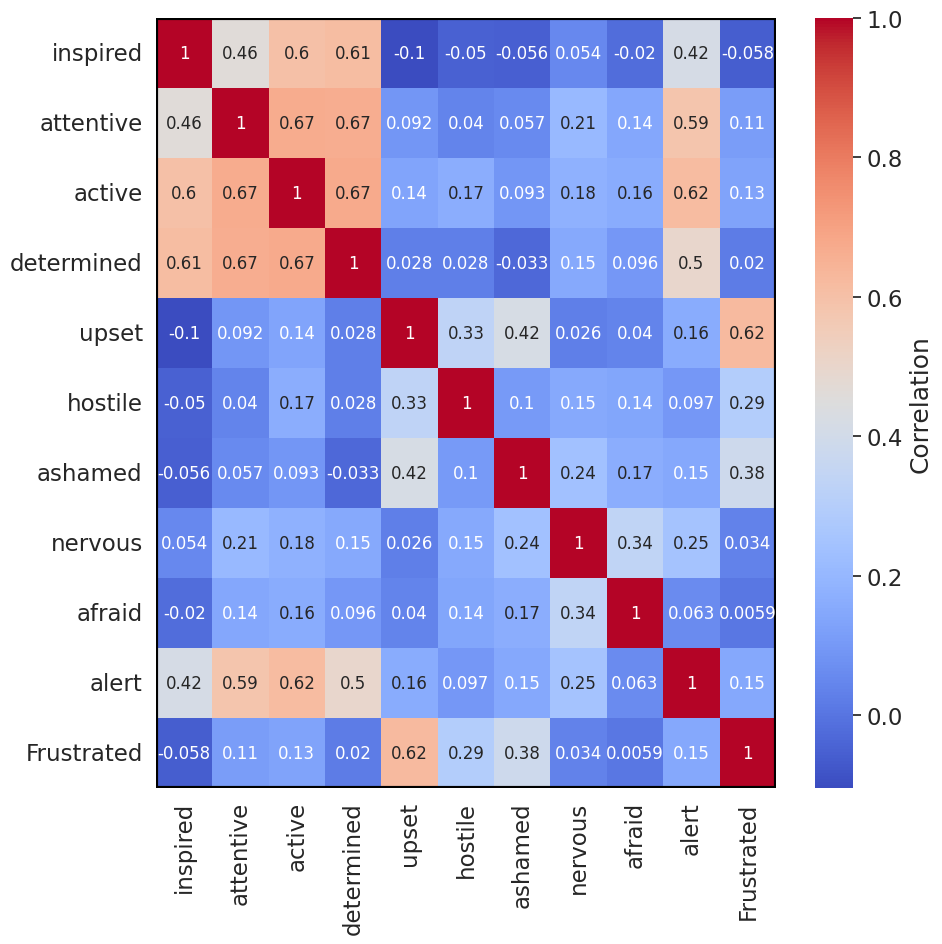

In [407]:
# Correlation of the features

correlation = features.corr()
plt.figure(figsize=(10,10))
# I only want to change the font of the labels outside the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'}, annot_kws={'size': 12})
# Outline the heatmap with a box and the colorbar (cbar_kws={'label': 'Correlation')
plt.gca().add_patch(plt.Rectangle((0, 0), correlation.shape[1], correlation.shape[0], fill=False, edgecolor='black', lw=3))

plt.savefig('figures/correlation.png')

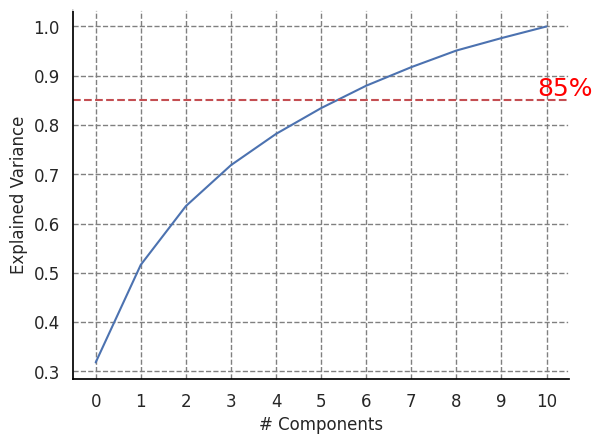

Number of components for 85% explained variance: 6


In [408]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
hr_data_scaled = scaler.fit_transform(features)

# PCA
# 11 Features

pca = PCA()
pca.fit(hr_data_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# Grid with style lines and dark gray color line and white background
plt.grid(True, linestyle='--', color='gray')
plt.gca().set_facecolor('white')
# Also add black lines for the axis
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
# Adjust fontize (bigger)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Remove title
plt.xlabel('# Components', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
# Add 85% explained variance line
plt.text(9.8, 0.86, '85%', color = 'red')
plt.axhline(y=0.85, color='r', linestyle='--')
# Ticks with step 1.0
plt.xticks(np.arange(0, 11, 1))
plt.savefig('figures/PCA_variance_85.png')
plt.show()

N = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.85)
print(f"Number of components for 85% explained variance: {N}")

# Save figure


In [409]:
# Perform PCA with N components
pca = PCA(n_components=N)
pca.fit(hr_data_scaled)
hr_data_pca = pca.transform(hr_data_scaled)

# Create a DataFrame with the PCA components
hr_data_pca = pd.DataFrame(hr_data_pca, columns=[f"PC{i}" for i in range(N)])

# Show ht_data_pca alonf with the feature names
print(hr_data_pca.head())

        PC0       PC1       PC2       PC3       PC4       PC5
0 -0.609101 -0.211507  0.735469 -0.119801 -0.854081 -0.403967
1  1.043935  1.472487  0.203539 -1.158379 -0.722330 -0.036136
2  1.081257 -0.115260  3.474507  0.448559  2.520271  0.010683
3  1.081257 -0.115260  3.474507  0.448559  2.520271  0.010683
4  3.584757  2.326190  3.707758 -0.795735  1.884183 -0.181846


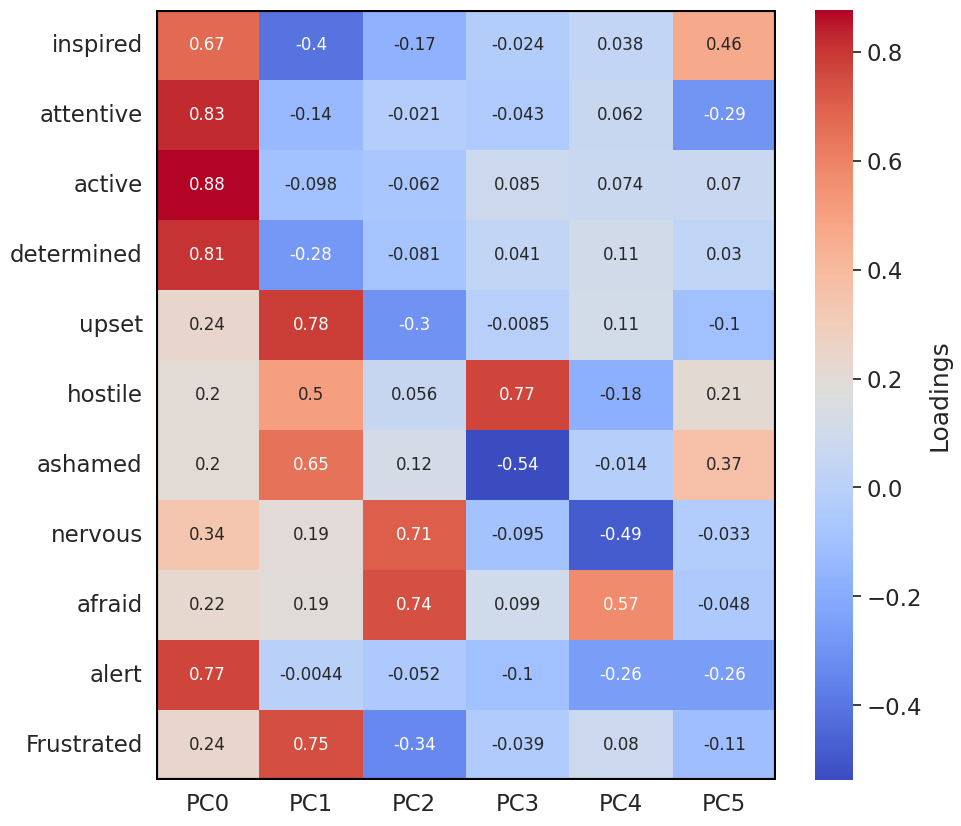

In [410]:
# Plot the factor loadings with the names of the features

# Get the loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# Create a DataFrame with the loadings
loadings_df = pd.DataFrame(loadings, columns=[f"PC{i}" for i in range(N)], index=features.columns)
# Plot the loadings
plt.figure(figsize=(10,10))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Loadings'}, annot_kws={'size': 12})
plt.gca().add_patch(plt.Rectangle((0, 0), loadings_df.shape[1], loadings_df.shape[0], fill=False, edgecolor='black', lw=3))
plt.savefig('PCA.png')
plt.show()

# Save figure

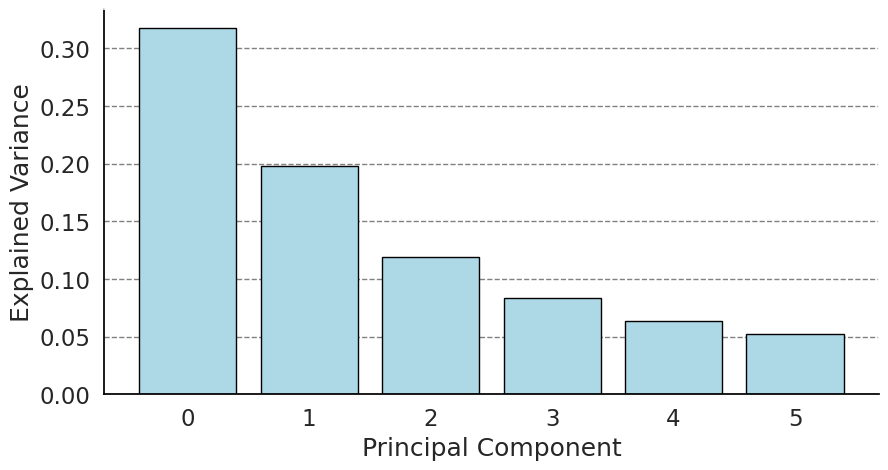

In [411]:
# How much variance does each component explain?
plt.figure(figsize=(10, 5))
# Light blue
# Add outline to the boxes
plt.bar(range(N), pca.explained_variance_ratio_, color='lightblue', edgecolor='black', linewidth=1)
# Add black x axis
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
# Add grid
plt.grid(True, linestyle='--', color='gray')
# Set background color to white
plt.gca().set_facecolor('white')
# Remove grid lines vertical
plt.gca().xaxis.grid(False)
plt.xticks(range(N))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.savefig('figures/PCA_variance.png', bbox_inches='tight')
plt.show()

# Save plot

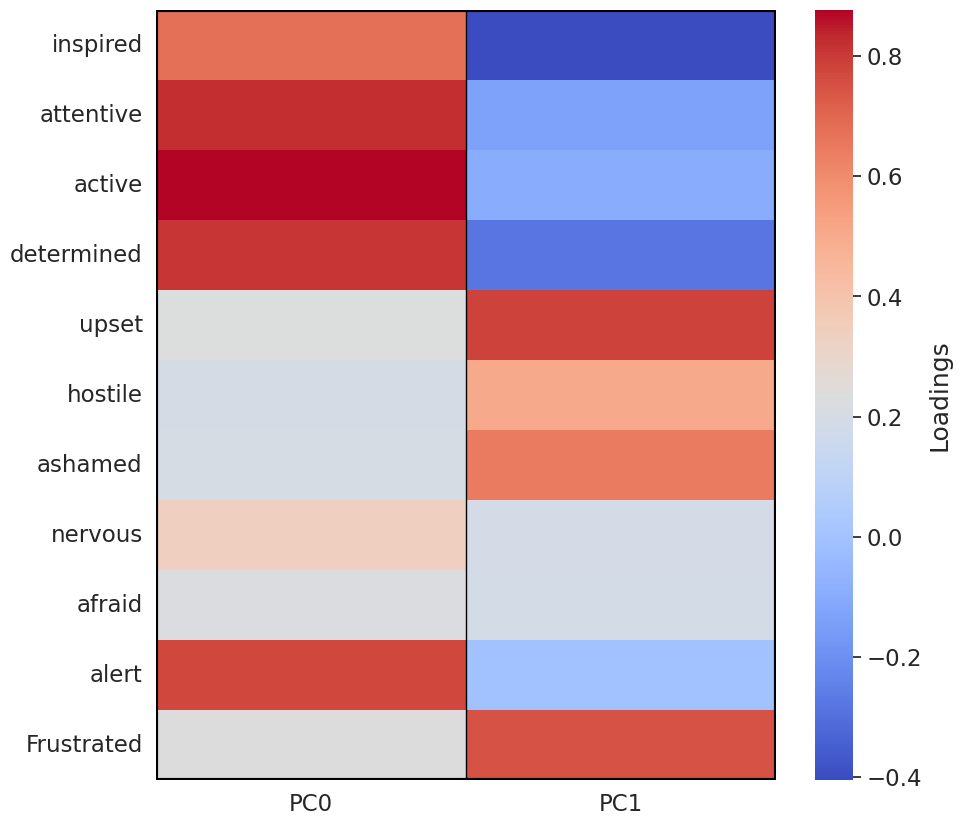

In [412]:
# Now I want to further analyze the components and how the features contribute to the components

# Get the loadings of the PCA components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f"PC{i}" for i in range(N)], index=features.columns)
loadings_df.head()

# Plot the loadings of the first two components and how much each feature contributes to them
plt.figure(figsize=(10, 10))
sns.heatmap(loadings_df[['PC0', 'PC1']], cmap='coolwarm', annot=False, cbar_kws={'label': 'Loadings'}, annot_kws={'size': 12})

# Add a rectangle around the heatmap
plt.gca().add_patch(plt.Rectangle((0, 0), 2, 11, fill=False, edgecolor='black', lw=3))
# Add also a vertical line betwen the loadings
plt.axvline(x=1, color='black', lw=1)

# Save figure
plt.savefig('figures/loadings_2First_PCA.png')

<Figure size 1000x1000 with 0 Axes>

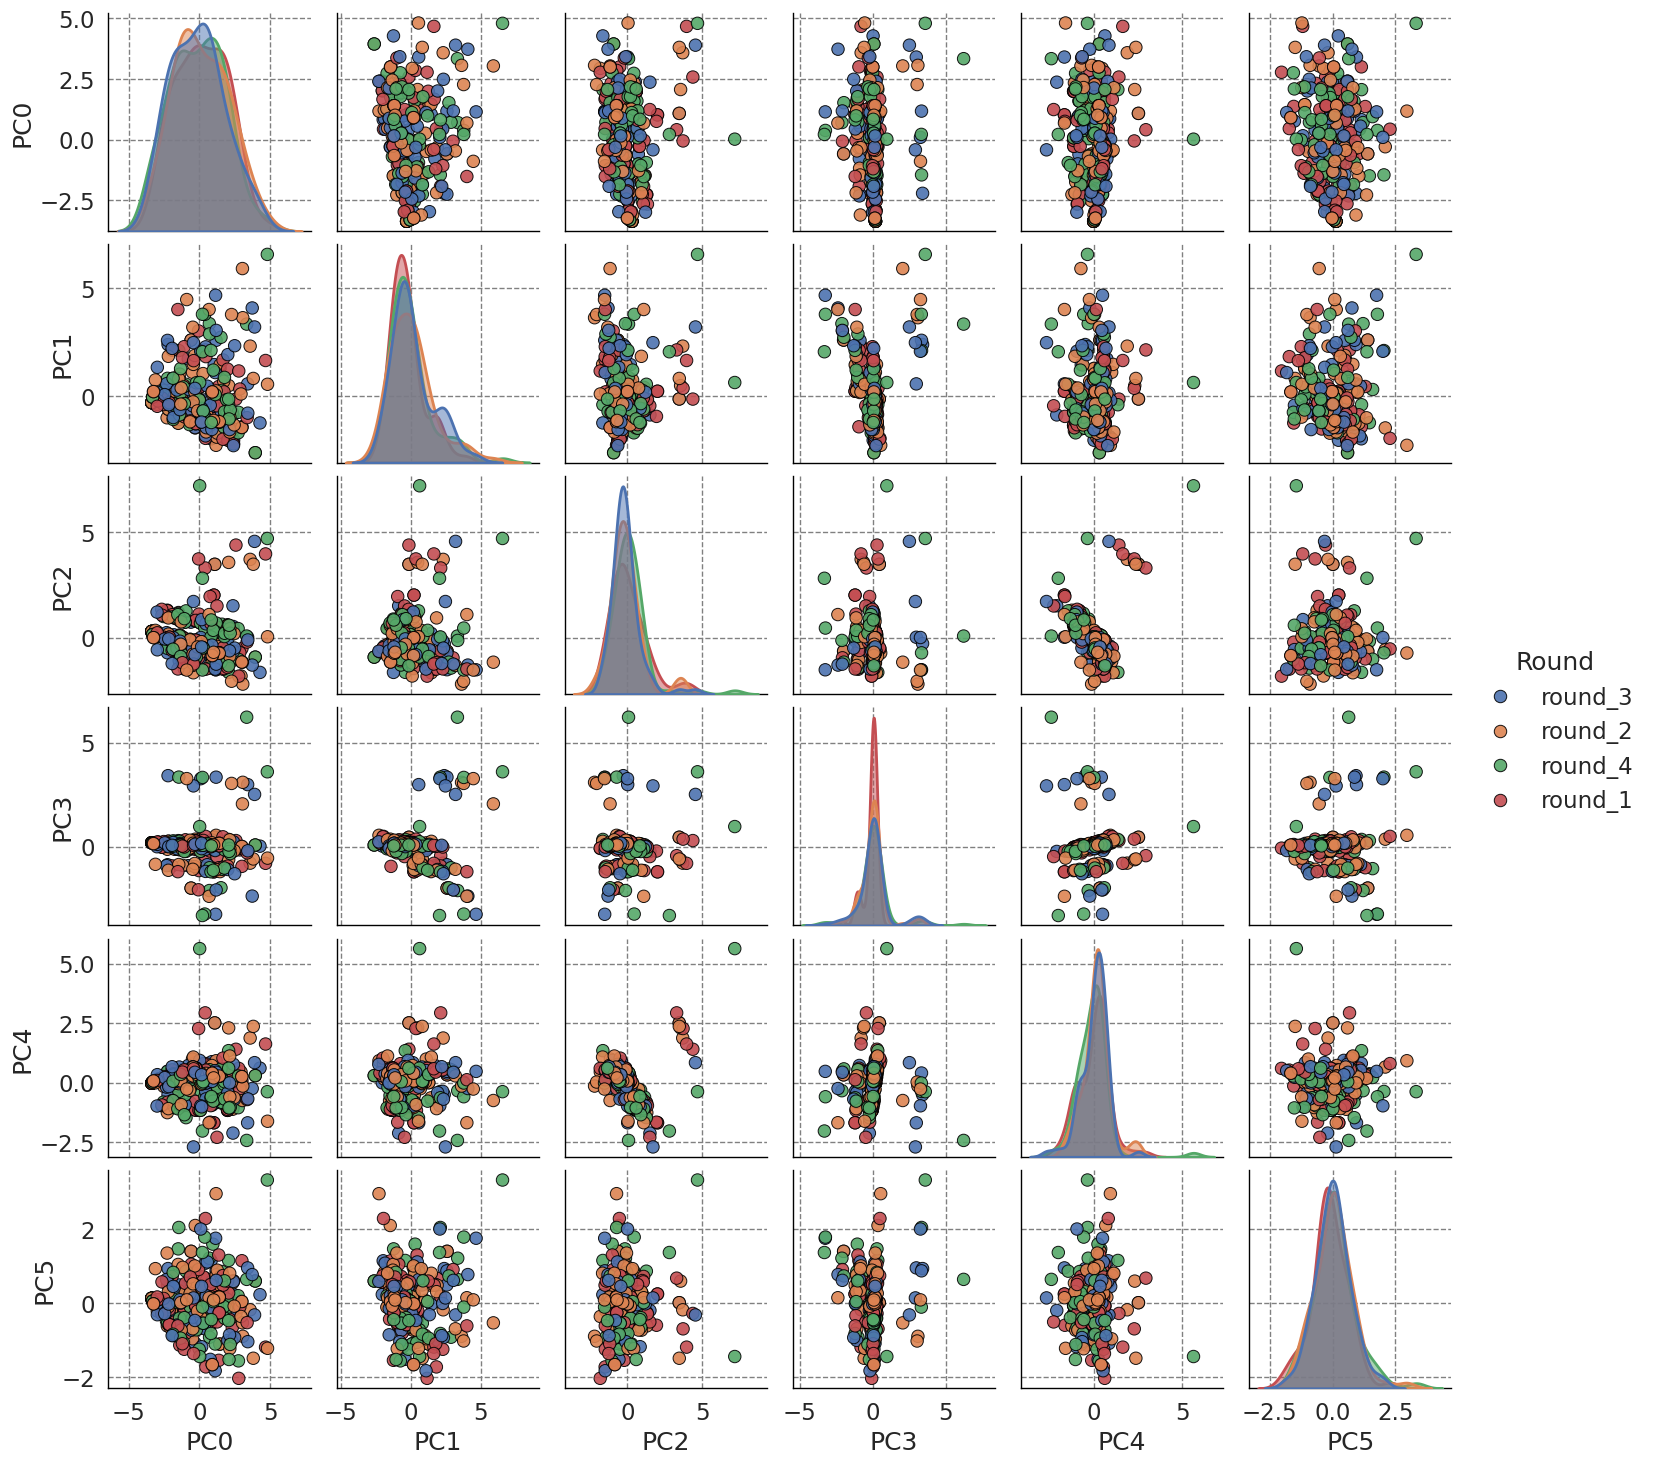

In [413]:
# I want to visualize the PCA components so I can see If I can find any visual teamings with respect to my target variable (overall_polarity)

# I want to see how the components are distributed
# Pairplot all the components
# Target is Round from original data (it has classes)
target = original_data['Round']
hr_data_pca['Round'] = target

# Increase font size for better readability
sns.set(font_scale=1.5)

# Create a figure with a specified size and white background
plt.figure(figsize=(10, 10))

# Generate a pairplot with 'Round' as the hue
# And have a black box around each plot, filled diagonal, bigger size for the points, transparency of 0.9, white background, legend
pair_plot = sns.pairplot(hr_data_pca, hue='Round', plot_kws={'edgecolor': 'black', 's': 80, 'alpha': 0.9}, diag_kind='kde', diag_kws={'alpha': 0.5, 'linewidth': 2.0}, height=2.5)
for ax in pair_plot.axes.flatten():
    # Set the properties for each subplot border
    for _, spine in ax.spines.items():
        spine.set_linewidth(1)  # Set the width of the outline
        spine.set_color('black')  # Set the color of the outline
        # Add white background and gray grid line
        ax.set_facecolor('white')
        ax.grid(True, linestyle='--', color='gray')

hr_data_pca.drop(columns=['Round'], inplace=True)

# Save figure
plt.savefig('figures/PCA_Pairplot_Round.png')

<Figure size 1000x1000 with 0 Axes>

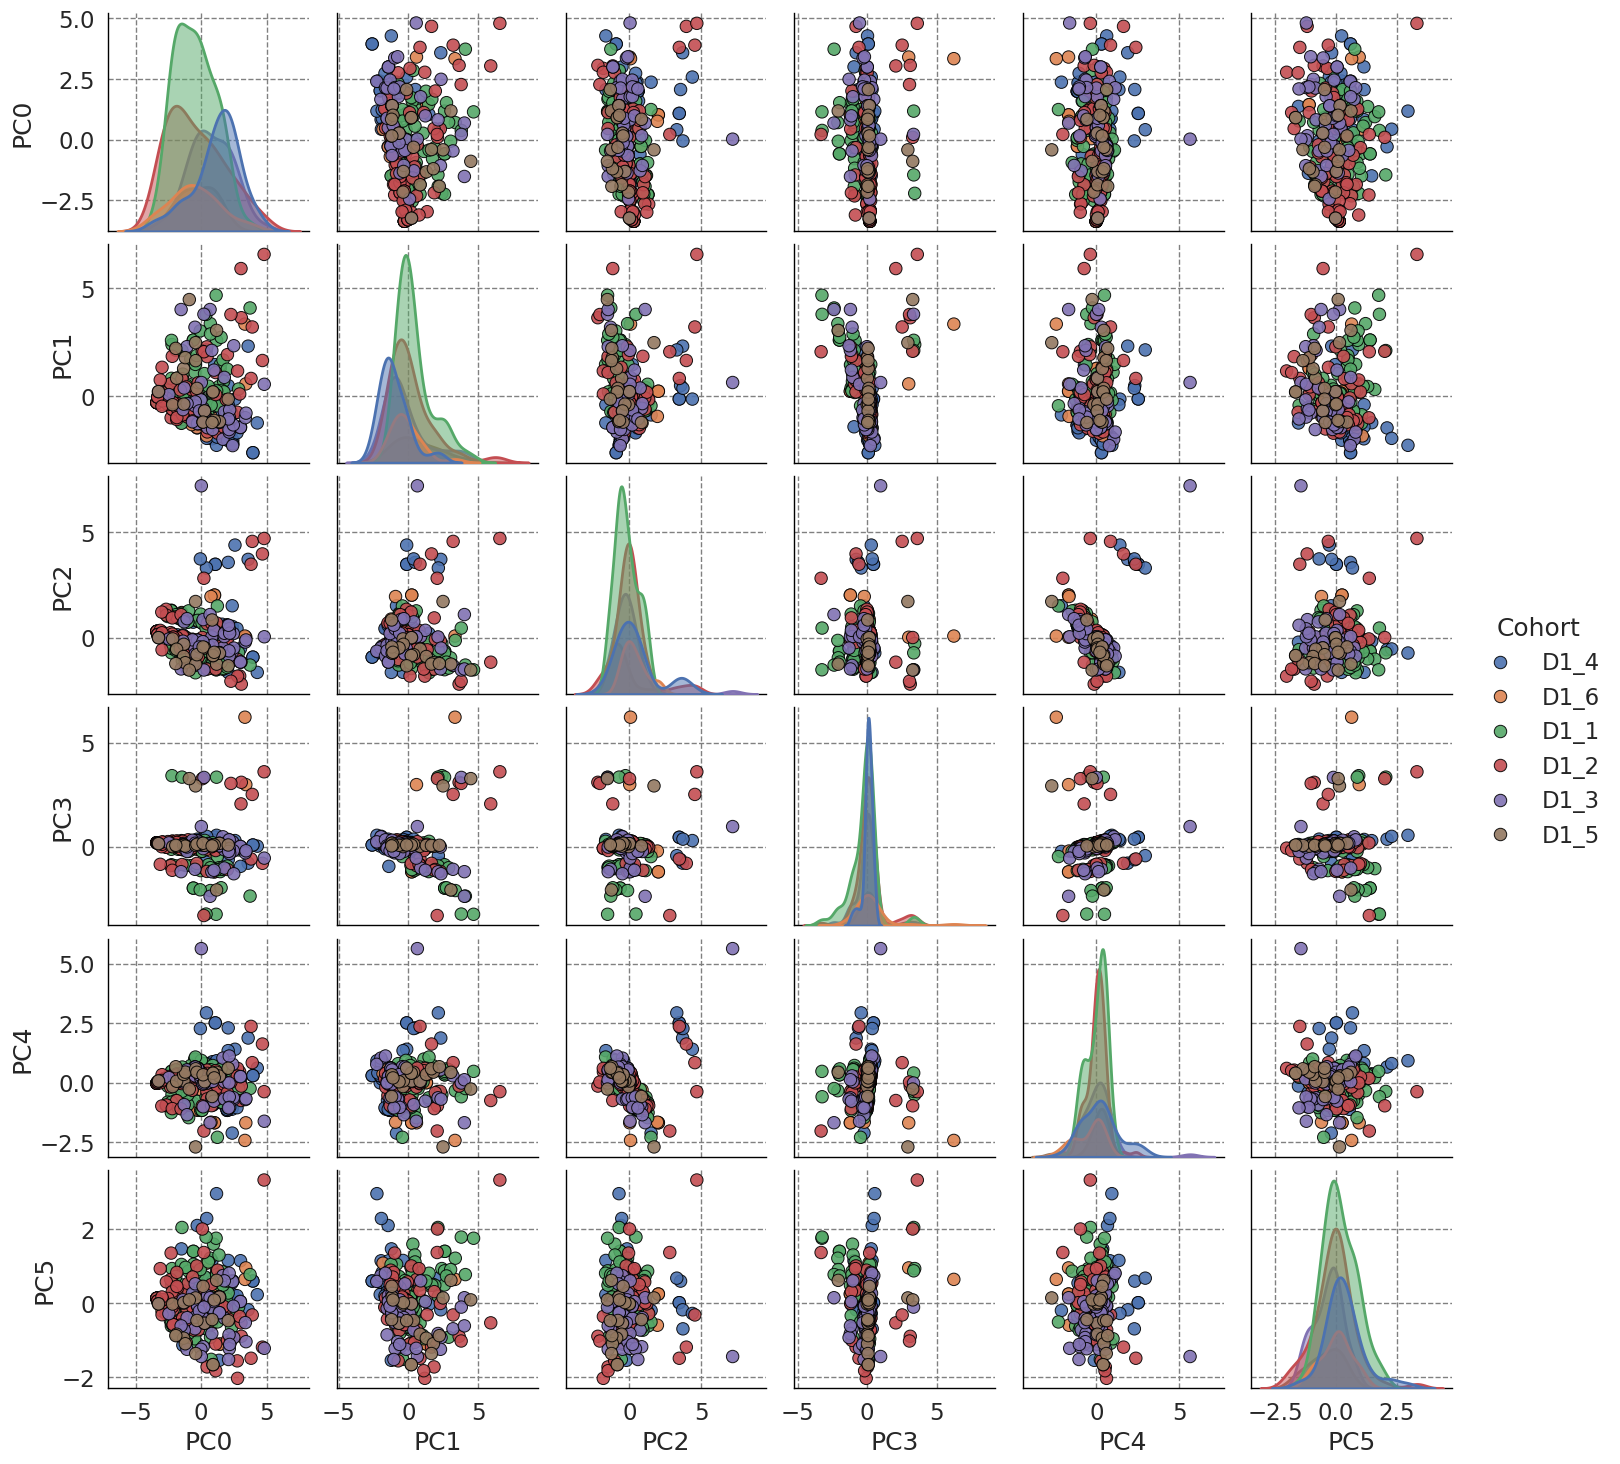

In [414]:
# I want to see how the components are distributed
# Pairplot all the components
# Target is Cohort from original data (it has classes)
target = original_data['Cohort']
hr_data_pca['Cohort'] = target

# Increase font size for better readability
sns.set(font_scale=1.5)

# Create a figure with a specified size and white backgCohort
plt.figure(figsize=(10, 10))

# Generate a pairplot with 'Cohort' as the hue
# And have a black box around each plot, filled diagonal, bigger size for the points, transparency of 0.9, white backgCohort, legend
pair_plot = sns.pairplot(hr_data_pca, hue='Cohort', plot_kws={'edgecolor': 'black', 's': 80, 'alpha': 0.9}, diag_kind='kde', diag_kws={'alpha': 0.5, 'linewidth': 2.0}, height=2.5)
for ax in pair_plot.axes.flatten():
    # Set the properties for each subplot border
    for _, spine in ax.spines.items():
        spine.set_linewidth(1)  # Set the width of the outline
        spine.set_color('black')  # Set the color of the outline
        # Add white background and gray grid line
        ax.set_facecolor('white')
        ax.grid(True, linestyle='--', color='gray')

hr_data_pca.drop(columns=['Cohort'], inplace=True)

# Save figure
plt.savefig('figures/PCA_Pairplot_Cohort.png')

<Figure size 1000x1000 with 0 Axes>

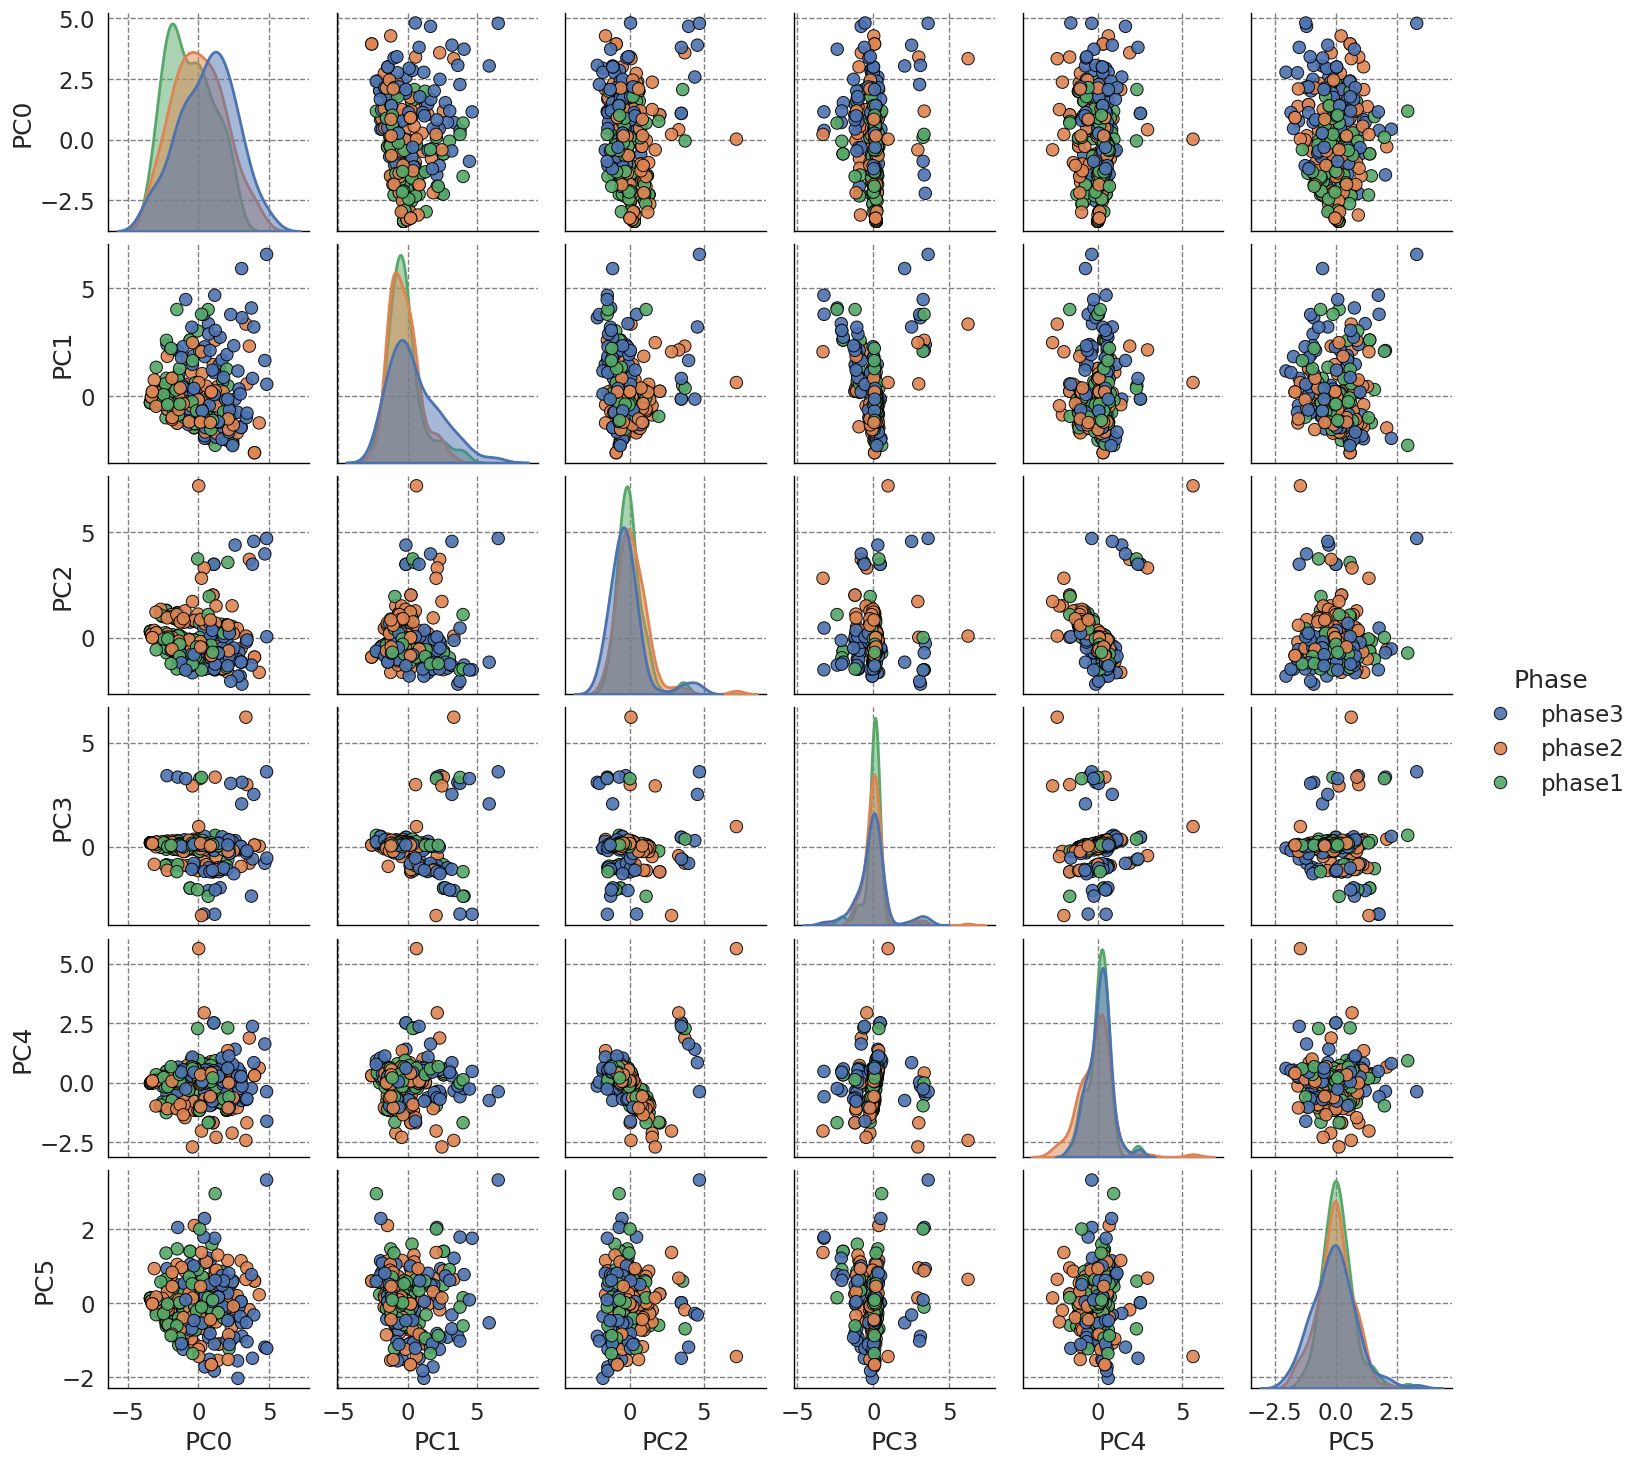

In [415]:
# I want to see how the components are distributed
# Pairplot all the components
# Target is Phase from original data (it has classes)
target = original_data['Phase']
hr_data_pca['Phase'] = target

# Increase font size for better readability
sns.set(font_scale=1.5)

# Create a figure with a specified size and white backgPhase
plt.figure(figsize=(10, 10))

# Generate a pairplot with 'Phase' as the hue
# And have a black box around each plot, filled diagonal, bigger size for the points, transparency of 0.9, white backgPhase, legend
pair_plot = sns.pairplot(hr_data_pca, hue='Phase', plot_kws={'edgecolor': 'black', 's': 80, 'alpha': 0.9}, diag_kind='kde', diag_kws={'alpha': 0.5, 'linewidth': 2.0}, height=2.5)
for ax in pair_plot.axes.flatten():
    # Set the properties for each subplot border
    for _, spine in ax.spines.items():
        spine.set_linewidth(1)  # Set the width of the outline
        spine.set_color('black')  # Set the color of the outline
        # Add white background and gray grid line
        ax.set_facecolor('white')
        ax.grid(True, linestyle='--', color='gray')

hr_data_pca.drop(columns=['Phase'], inplace=True)

# Save figure
plt.savefig('figures/PCA_pairplot_Phase.png')

In [417]:
original_data['Cohort'].unique()

array(['D1_4', 'D1_6', 'D1_1', 'D1_2', 'D1_3', 'D1_5'], dtype=object)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      D1_4
1      D1_4
2      D1_4
3      D1_4
4      D1_4
       ... 
307    D1_5
308    D1_5
309    D1_5
310    D1_5
311    D1_5
Name: Cohort, Length: 312, dtype: object

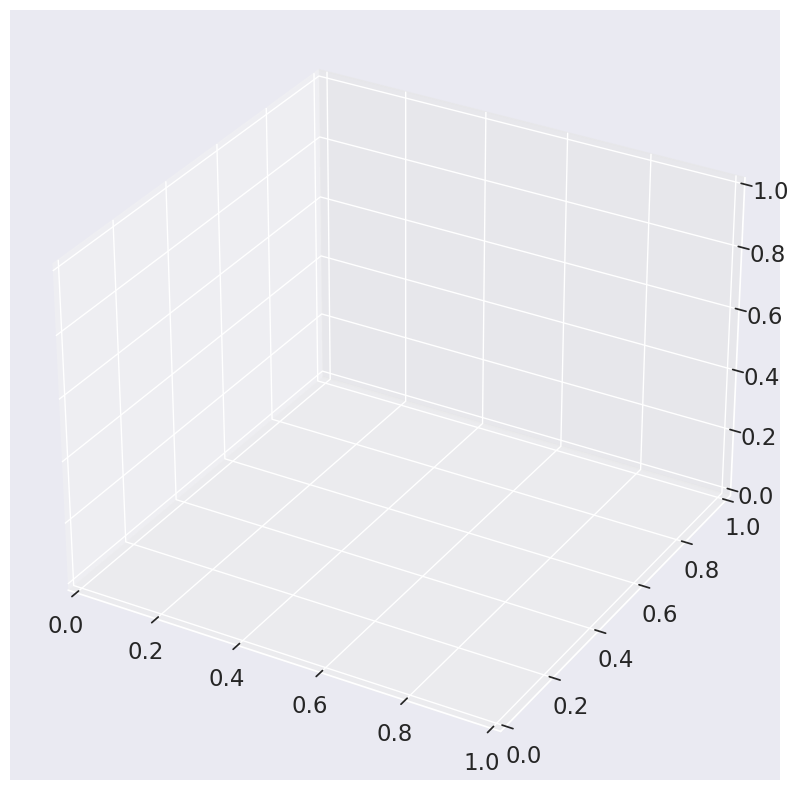

In [416]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with a specified size and white background
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the first three principal components
# With 'Cohort' as the color

# Map cohort values to colors

colors = {'D1_1': 'red', 'D1_2': 'blue', 'D1_3': 'green', 'D1_4': 'purple', 'D1_5': 'orange', 'D1_6': 'yellow'}

scatter = ax.scatter(hr_data_pca['PC0'], hr_data_pca['PC1'], hr_data_pca['PC2'], c=original_data['Cohort'], cmap='coolwarm', s=80, edgecolor='black', alpha=0.9)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cohort')

# Set the properties for each subplot border
for spine in ax.spines.values():
    spine.set_linewidth(1)  # Set the width of the outline
    spine.set_color('black')  # Set the color of the outline

# Add white background and gray grid line
ax.set_facecolor('white')
ax.grid(True, linestyle='--', color='gray')

## Research question ideas

We will ignore the biometric features and we will try to explore the feeling related features and see if we can express them into a lower dimensions.

- Explore pairplots
- Explore factor loadings

Number of components with eigenvalues > 1: 3


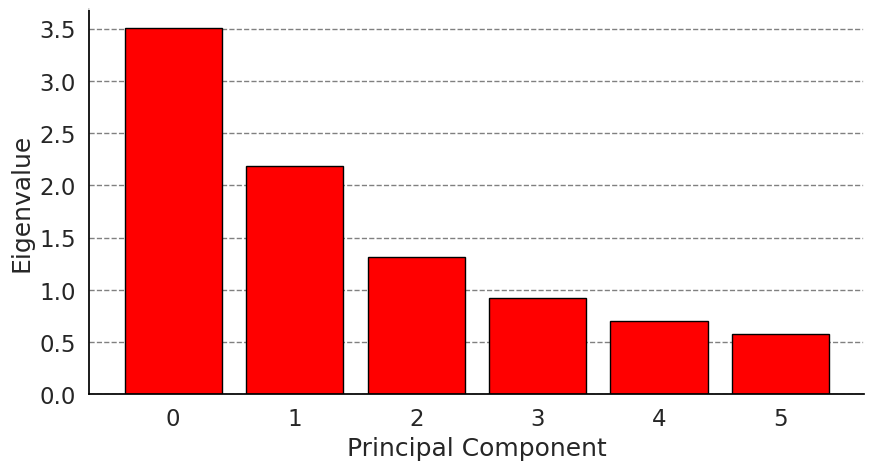

In [ ]:
# Apply Kaiser creterion to find the number of components to keep
# Kaiser criterion: keep components with eigenvalues > 1
# Get the eigenvalues
eigenvalues = pca.explained_variance_
# Count the number of eigenvalues > 1
N = np.sum(eigenvalues > 1)
print(f"Number of components with eigenvalues > 1: {N}")

# Apply scree plot to find the number of components to keep
# Scree plot: plot the eigenvalues
plt.figure(figsize=(10, 5))
# Light blue
# Add outline to the boxes
plt.bar(range(len(eigenvalues)), eigenvalues, color='red', edgecolor='black', linewidth=1)
# Add black x axis
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
# Add grid
plt.grid(True, linestyle='--', color='gray')
# Set background color to white
plt.gca().set_facecolor('white')
# Remove grid lines vertical
plt.gca().xaxis.grid(False)
plt.xticks(range(len(eigenvalues)))
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.savefig('figures/PCA_eigenvalues.png')
plt.show()

# Save figure

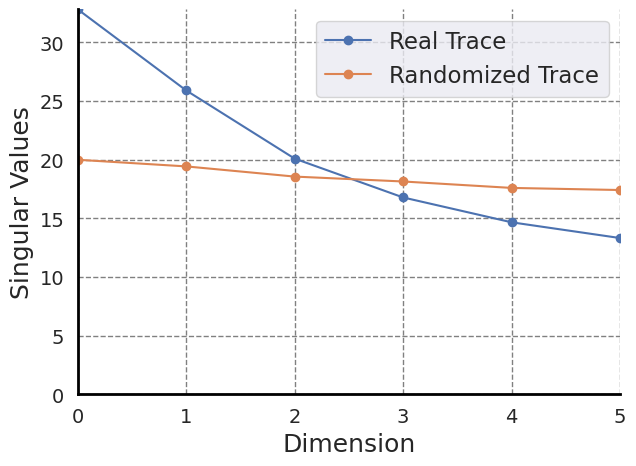

In [ ]:
#  Create a randomized dataset with the same shape and standard deviation as the real dataset

np.random.seed(42)  # for reproducibility
hr_data_random = np.random.normal(0, 1, hr_data_scaled.shape)

# Perform PCA on the randomized data
pca_random = PCA().fit(hr_data_random)

# Plot both sets of singular values
plt.figure(figsize=(7, 5))

# Draw the real and randomized traces
plt.plot(pca.singular_values_, label='Real Trace', marker='o')
plt.plot(pca_random.singular_values_, label='Randomized Trace', marker='o')

# Set plot title and labels
plt.xlabel('Dimension')
plt.ylabel('Singular Values')

# Add a legend
plt.legend()

# Customize grid and background
plt.grid(True, color='gray', linestyle='--')
plt.gca().set_facecolor('white')

# Customize ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set spine properties to only show the bottom and left spine
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Set the limits for the x-axis and y-axis to the data range
ax.set_xlim([0, len(pca.singular_values_) - 1])
ax.set_ylim([0, max(max(pca.singular_values_), max(pca_random.singular_values_))])

# Show the plot
plt.savefig('figures/PCA_Singular_Values.png')
plt.show()

# Save figure


In [ ]:
# Varimax rotation
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Assuming your standardized data matrix
X = hr_data_scaled

# Check if the data is suitable for factor analysis
chi_square_value, p_value = calculate_bartlett_sphericity(X)
if p_value < 0.05:
    print("Factor analysis is suitable for this dataset.")

# If we observe the graph, we see that the elbow is at N=2
n_factors = 3

# Initialize factor analysis object and perform factor analysis using PCA
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")
fa.fit(X)


Factor analysis is suitable for this dataset.


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

[[ 0.70609652 -0.14178971 -0.062071  ]
 [ 0.76824273  0.08368391  0.15504496]
 [ 0.8481605   0.14003525  0.12901541]
 [ 0.82109401 -0.03153598  0.05410758]
 [ 0.03681916  0.85314666 -0.04723761]
 [ 0.0407495   0.36175158  0.1469069 ]
 [-0.00519128  0.48735398  0.25089913]
 [ 0.13244663  0.08132837  0.70630535]
 [ 0.06216909  0.06873624  0.47638358]
 [ 0.65536093  0.17720065  0.16403908]
 [ 0.05301752  0.75143552 -0.04976423]]
[[-4.35303666e-01 -3.12444894e-01  6.20727282e-01]
 [ 1.78518287e-01  9.80357391e-01  6.37163836e-01]
 [ 1.13966523e-01 -3.39496390e-01  1.60180445e+00]
 [ 1.13966523e-01 -3.39496390e-01  1.60180445e+00]
 [ 8.07547880e-01  1.75886580e+00  2.51341830e+00]
 [ 4.51637147e-01 -2.15270551e-01  1.81492073e+00]
 [-1.57797987e+00 -6.28307296e-01 -2.88508385e-01]
 [ 4.78586160e-01 -7.19182550e-01  6.22713687e-01]
 [-6.66328827e-01 -5.40233520e-01 -4.16643083e-01]
 [ 7.45088356e-01 -2.84987746e-01  2.62509441e+00]
 [-4.13897066e-01  9.60759361e-01  1.64249605e+00]
 [-6.1919

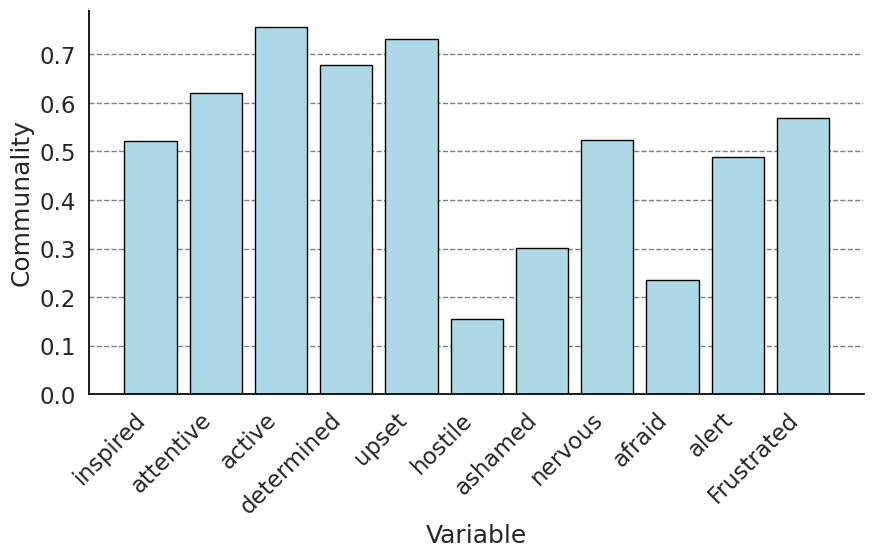

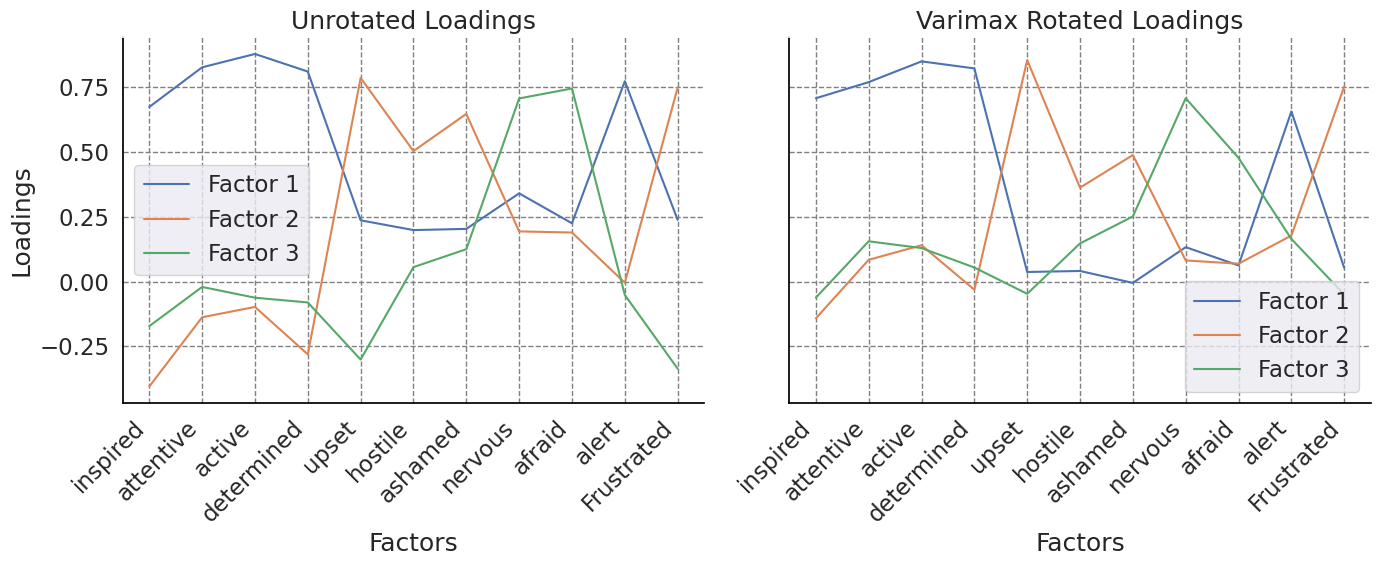

In [ ]:
# Now perform factor analysis again, but with Varimax rotation this time
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(X)

# Get the loadings (factor pattern matrix)
fa_loadings = fa.loadings_
print(fa_loadings)

# Get factor scores for each observation
factor_scores = fa.transform(hr_data_scaled)  # Use this for further analysis
print(factor_scores)

# Get communalities, which indicate the amount of variance in each variable explained by the factors
communalities = fa.get_communalities()
print(communalities)

# Visualize communalities
plt.figure(figsize=(10, 5))
plt.xticks(range(len(communalities)), features.columns, rotation=45, ha='right')
plt.bar(range(len(communalities)), communalities, color='lightblue', edgecolor='black', linewidth=1)
plt.xlabel('Variable')
plt.ylabel('Communality')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.grid(True, linestyle='--', color='gray')
plt.gca().set_facecolor('white')
# remove grid lines vertical
plt.gca().xaxis.grid(False)
plt.savefig('figures/PCA_rotated_communalities.png')


# Assuming `loadings_unrotated` and `loadings_rotated` are your loading matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot unrotated loadings
# Select only the first 3 components
unrotated_loadings = loadings_df.iloc[:, :3]
# Set grid lines to gray dashed lines
axes[0].grid(True, linestyle='--', color='gray')
axes[1].grid(True, linestyle='--', color='gray')
# Set the color of the axis to black
axes[0].spines['bottom'].set_color('black')
axes[0].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['left'].set_color('black')

# Set background color to white
axes[0].set_facecolor('white')
axes[1].set_facecolor('white')
axes[0].plot(unrotated_loadings)
axes[0].set_title('Unrotated Loadings')
axes[0].set_xlabel('Factors')
axes[0].set_ylabel('Loadings')
axes[0].legend(['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6'], loc='best')
# Set the x-ticks to be the feature names
axes[0].set_xticks(range(len(features.columns)))
axes[0].set_xticklabels(features.columns, rotation=45, ha='right')

# Plot rotated loadings
axes[1].plot(fa_loadings)
axes[1].set_title('Varimax Rotated Loadings')
axes[1].set_xlabel('Factors')
# No need to set y-label as it's shared with the first plot
axes[1].legend(['Factor 1', 'Factor 2', 'Factor 3'], loc='best')  # Adjust legends based on your factors
axes[1].set_xticks(range(len(features.columns)))
axes[1].set_xticklabels(features.columns, rotation=45, ha='right')
# Move legend to the right
plt.tight_layout()

plt.savefig('figures/PCA_rotated_loadings_comparison.png')
plt.show()
